# Short Assignment 3 - Solutions

In this problem, you will implement the Naive Bayes Classifier on the **Breast Cancer Wisconsin Dataset**.

## Breast Cancer Wisconsin Dataset

This dataset is available as part of the datasets' database on ```scikit-learn```.

Data was collected from 569 digitized image of a fine needle aspirate (FNA) of a breast mass. For each FNA image, 30 features were automatically extracted, including: average cell radius, average cell texture, average cell perimeter, average cell area, average cell smoothness, and 25 others.

Let's load the dataset for a full description:

In [1]:
from sklearn.datasets import load_breast_cancer
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('bmh')

In [2]:
data = load_breast_cancer(return_X_y=False)

In [3]:
print(data.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        worst/largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 0 is Mean Radi

A subset of these 569 samples are labeled as malignant and others as benign.

In [4]:
# 0 - Malignant, 1 - benign
target = data.target

np.unique(target)

array([0, 1])

In [5]:
print('There are ',np.sum(target==0),' samples labeled as malignant')
print('There are ',np.sum(target==1),' samples labeled as benign')

There are  212  samples labeled as malignant
There are  357  samples labeled as benign


For this problem, let's consider the first two features only. Those are the radius and texture:

In [6]:
X = data.data[:,0:2]

print(X.shape)

(569, 2)


The matrix X contains all samples for these 2 features. We can further separate them into malignant samples and benign samples:

In [7]:
X_mal = X[target==0,:]
X_ben = X[target==1,:]

print(X_mal.shape, X_ben.shape)

(212, 2) (357, 2)


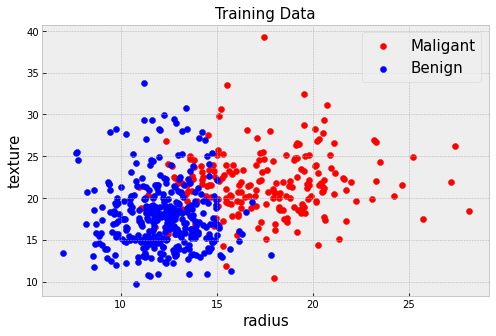

In [10]:
plt.figure(figsize=(8,5))
plt.scatter(X_mal[:,0], X_mal[:,1], c='r',label='Maligant')
plt.scatter(X_ben[:,0], X_ben[:,1], c='b',label='Benign')
plt.legend(fontsize=15); plt.title('Training Data', size=15)
plt.xlabel('radius',size=15)
plt.ylabel('texture', size=15);

# Problem

Answer the following questions:

1. Compute the MLE estimate for the mean and covariance matrix for both classes.

2. Compute the prior probabilities for both classes.

3. Compute and display (using ```imshow```) the data likelihood for both classes.

4. Compute the posterior distribution for both classes, and plot the decision boundary.

5. Suppose that the hospital collected another FNA and measured an average radius of 18 and an average texture of 22. Using your classifier, how would you classify that new point? How confident are you in that decision?

6. Consider another new sample with radius 30 and texture 30. What classification would you report back to the doctor? How confident are you in that decision?

In [12]:
# Problem 1

# Mean for each class
mu0 = np.mean(X[target==0,:],axis=0)
mu1 = np.mean(X[target==1,:],axis=0)

# Covariance for each class
cov0 = np.cov(X[target==0,:].T)
cov1 = np.cov(X[target==1,:].T)

print('Mean for Class Malignant =',mu0)
print('Covariance for Class Malignant =',cov0,'\n')

print('Mean for Class Benign =',mu1)
print('Covariance for Class Benign =',cov1)

Mean for Class Malignant = [17.46283019 21.60490566]
Covariance for Class Malignant = [[10.26543081  1.28984055]
 [ 1.28984055 14.28439288]] 

Mean for Class Benign = [12.14652381 17.9147619 ]
Covariance for Class Benign = [[ 3.17022172 -0.26426039]
 [-0.26426039 15.96102052]]


In [13]:
# Problem 2

# Prior probability for each class
pC0 = np.sum(target==0)/target.size
pC1 = np.sum(target==1)/target.size

print('Prior Probability for Class Malignant = ',pC0)
print('Prior Probability for Class Benign = ',pC1)

Prior Probability for Class Malignant =  0.37258347978910367
Prior Probability for Class Benign =  0.6274165202108963


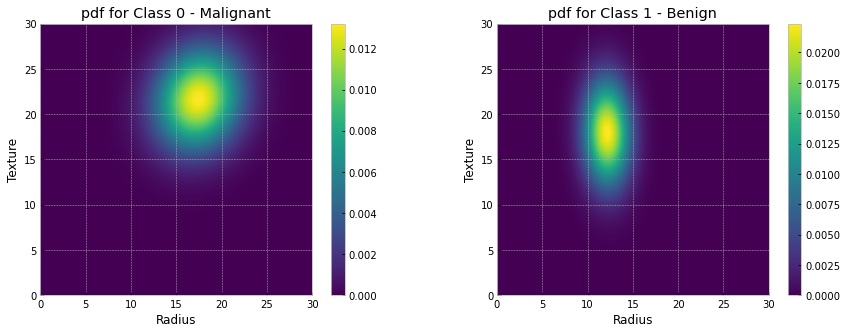

In [17]:
# Problem 3

from scipy.stats import multivariate_normal

grid_min = 0
grid_max = 30

x = np.linspace(grid_min, grid_max, 1000)
y = np.linspace(grid_min, grid_max, 1000)
xm, ym = np.meshgrid(x, y)
X = np.flip(np.dstack([xm,ym]),axis=0)

# Let's plot the probability density function (pdf)
y0 = multivariate_normal.pdf(X, mean=mu0, cov=cov0) #P(x|C0)
y1 = multivariate_normal.pdf(X, mean=mu1, cov=cov1) #P(x|C1)

fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(y0, extent=[grid_min, grid_max, grid_min,grid_max])
plt.colorbar(); plt.xlabel('Radius'); plt.ylabel('Texture')
plt.title('pdf for Class 0 - Malignant')

fig.add_subplot(1,2,2)
plt.imshow(y1, extent=[grid_min, grid_max, grid_min,grid_max])
plt.colorbar(); plt.xlabel('Radius'); plt.ylabel('Texture')
plt.title('pdf for Class 1 - Benign');

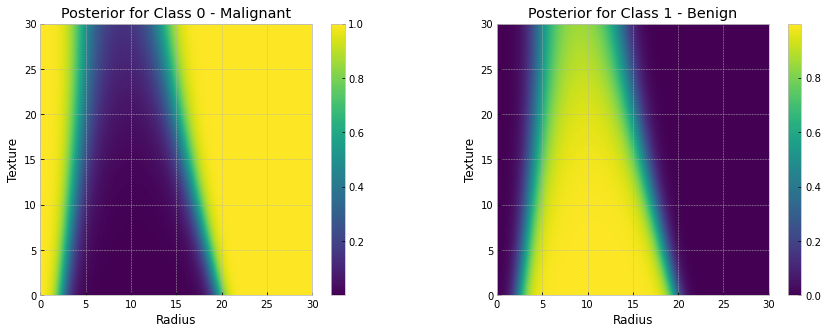

In [16]:
# Problem 4

# Posterior probabilities for each class
pos0 = (y0*pC0)/(y0*pC0 + y1*pC1)
pos1 = (y1*pC1)/(y0*pC0 + y1*pC1)

fig =plt.figure(figsize=(15,5))
fig.add_subplot(1,2,1)
plt.imshow(pos0, extent=[grid_min,grid_max,grid_min,grid_max])
plt.colorbar(); plt.xlabel('Radius'); plt.ylabel('Texture')
plt.title('Posterior for Class 0 - Malignant')

fig.add_subplot(1,2,2)
plt.imshow(pos1, extent=[grid_min,grid_max,grid_min,grid_max])
plt.colorbar(); plt.xlabel('Radius'); plt.ylabel('Texture')
plt.title('Posterior for Class 1 - Benign');

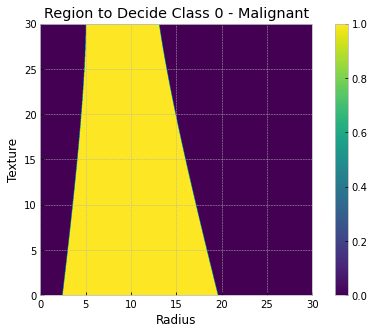

In [18]:
plt.figure(figsize=(8,5))
plt.imshow(pos0 < pos1, extent=[grid_min,grid_max,grid_min,grid_max])
plt.colorbar(); plt.xlabel('Radius'); plt.ylabel('Texture')
plt.title('Region to Decide Class 0 - Malignant');

In [22]:
# Problem 5

x = [18,22]

# Data Likelihoods
y0_newPoint = multivariate_normal.pdf(x, mean=mu0, cov=cov0) # p(x|C0)
y1_newPoint = multivariate_normal.pdf(x, mean=mu1, cov=cov1) # p(x|C1)

print('Data likelihoods:')
print('P(x|Malignant) = ', y0_newPoint)
print('P(x|Benign) = ', y1_newPoint,'\n')

# Posterior Probabilities
y0_pos = y0_newPoint*pC0/(y0_newPoint*pC0 + y1_newPoint*pC1)
y1_pos = y1_newPoint*pC1/(y0_newPoint*pC0 + y1_newPoint*pC1)

print('Posterior probabilities:')
print('P(Malignant|x) = ', y0_pos)
print('P(Benign|x) = ', y1_pos,'\n')

if y0_pos > y1_pos:
    print('x = ',x,' is a Malignant sample')
else:
    print('x = ',x,' is a Benign sample')

Data likelihoods:
P(x|Malignant) =  0.012984476229293579
P(x|Benign) =  5.2267741180242404e-05 

Posterior probabilities:
P(Malignant|x) =  0.9932670147244329
P(Benign|x) =  0.006732985275567139 

x =  [18, 22]  is a Malignant sample


Let's now look at a new data sample far away from the distribution centers: radius = 30 and texture = 30.

In [24]:
# Problem 6

x = [30,30]

# Data Likelihoods
y0_newPoint = multivariate_normal.pdf(x, mean=mu0, cov=cov0) # p(x|C0)
y1_newPoint = multivariate_normal.pdf(x, mean=mu1, cov=cov1) # p(x|C1)

print('Data likelihoods:')
print('P(x|Malignant) = ', y0_newPoint)
print('P(x|Benign) = ', y1_newPoint,'\n')

# Posterior Probabilities
y0_pos = y0_newPoint*pC0/(y0_newPoint*pC0 + y1_newPoint*pC1)
y1_pos = y1_newPoint*pC1/(y0_newPoint*pC0 + y1_newPoint*pC1)

print('Posterior probabilities:')
print('P(Malignant|x) = ', y0_pos)
print('P(Benign|x) = ', y1_pos,'\n')

if y0_pos > y1_pos:
    print('x = ',x,' is a Malignant sample')
else:
    print('x = ',x,' is a Benign sample')

Data likelihoods:
P(x|Malignant) =  1.2054634203690417e-06
P(x|Benign) =  1.0167210990312105e-26 

Posterior probabilities:
P(Malignant|x) =  1.0
P(Benign|x) =  1.4203002223082662e-20 

x =  [30, 30]  is a Malignant sample


The end result (posterior) is absolutely sure it is malignant... BUT the likelihood of that point in either class is very small! So we should alert the doctor to check data collection or consider other tests.